In [1]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

    
RAW_FOLDER = "raw"
PROCESSED_FOLDER = "processed"

    
def write_dict_into_json(dictionary, filename):
    with open(filename, "w") as write_file:
        json.dump(dictionary, write_file, indent=4)
        
        


In [5]:
reviews = pd.read_parquet("../../data/processed/reviews_with_interactions.parquet")
reviewers = pd.read_parquet("../../data/processed/reviewers_with_interactions.parquet")
listings = pd.read_parquet("../../data/processed/listings_with_interactions.parquet")


## Reviews

5    1260537
4     148599
3      25143
2       5027
1       3381
Name: rating, dtype: int64

<AxesSubplot: >

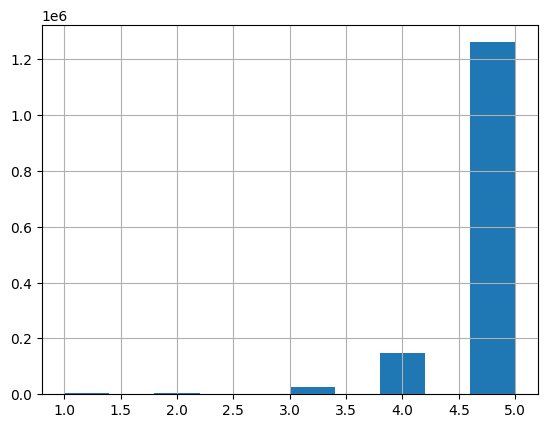

In [4]:
display(reviews['rating'].value_counts())
reviews['rating'].hist()

/var/folders/mr/dg98_zmd5d90zd_4275kp9r00000gn/T/ipykernel_1682/3624370955.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  reviews['month_by_year'] = reviews['created_at'].dt.to_period('M')


<AxesSubplot: xlabel='month_by_year'>

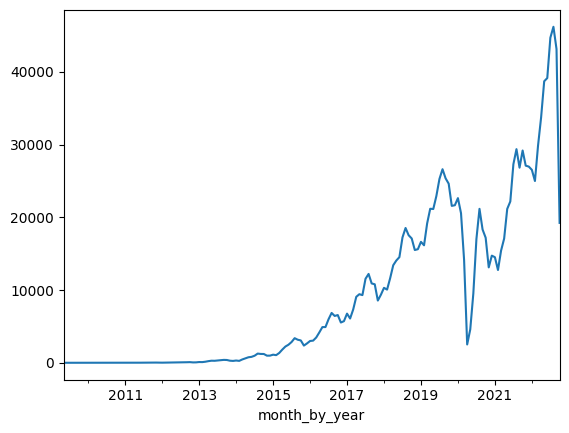

In [5]:
reviews['month_by_year'] = reviews['created_at'].dt.to_period('M')
reviews.groupby('month_by_year')['id'].count().plot()

In [22]:
reviews['created_at'].describe()

/var/folders/mr/dg98_zmd5d90zd_4275kp9r00000gn/T/ipykernel_2605/1694419109.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  reviews['created_at'].describe()


count                       1442687
unique                      1429548
top       2021-09-15 12:02:31+00:00
freq                              4
first     2009-05-23 16:27:17+00:00
last      2022-10-23 13:01:08+00:00
Name: created_at, dtype: object

In [31]:
reviews['created_at'].max()

Timestamp('2022-10-23 13:01:08+0000', tz='UTC')

In [6]:
len(reviews[reviews['created_at'] >= '2009-05-23'])

1442687

In [11]:
reviews['listing_id'].nunique()

20799

In [17]:
review_count_by_listing = reviews.groupby('listing_id')['id'].count()
# Convert the result into a pandas DataFrame
df_review_count_by_listing = review_count_by_listing.reset_index()

# Rename the columns of the DataFrame to 'listing_id' and 'review_count'
df_review_count_by_listing.columns = ['listing_id', 'review_count']

In [42]:
zero_reviewsdf['listing_id'].nunique()

      listing_id  review_count
0       10005529             3
1       10009892             1
2        1001182           360
3       10013750            30
4       10016444            38
...          ...           ...
20794    9980433             6
20795    9986303            30
20796    9989995           101
20797    9991948            59
20798     999835           121

[20799 rows x 2 columns]


In [26]:
review_count_by_listing.describe()

count    20799.000000
mean        69.363287
std        104.718004
min          1.000000
25%          7.000000
50%         28.000000
75%         89.000000
max       1871.000000
Name: id, dtype: float64

(array([1.1705e+04, 3.1210e+03, 1.8660e+03, 1.2100e+03, 8.0800e+02,
        5.4500e+02, 4.2100e+02, 2.9900e+02, 1.9800e+02, 1.6600e+02,
        1.0200e+02, 6.6000e+01, 6.7000e+01, 5.7000e+01, 3.8000e+01,
        2.8000e+01, 2.0000e+01, 1.0000e+01, 1.8000e+01, 1.6000e+01,
        5.0000e+00, 6.0000e+00, 7.0000e+00, 6.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 3.8400e+01, 7.5800e+01, 1.1320e+02, 1.5060e+02,
        1.8800e+02, 2.2540e+02, 2.6280e+02, 3.0020e+02, 3.3760e+02,
        3.7500e+02, 4.1240e+02, 4.4980e+02, 4.8720e+02, 5.2460e+02,
        5.6200e+02, 5.9940e+02, 6.3680e+02, 6.7420e+02, 7.1160e+02,
        7.4900e+02, 7.8640e+02, 8.2380e+02, 8.

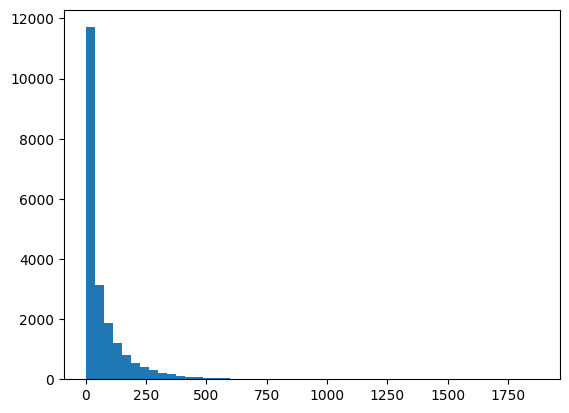

In [60]:
plt.hist(review_count_by_listing, bins=50)

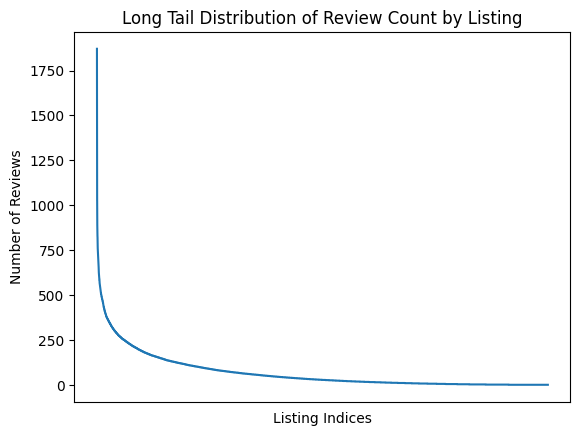

In [59]:
review_count_by_listing_sorted = review_count_by_listing.sort_values(ascending=False)

plt.plot(review_count_by_listing_sorted.index, review_count_by_listing_sorted)
plt.xlabel("Listing Indices")
plt.ylabel("Number of Reviews")
plt.title("Long Tail Distribution of Review Count by Listing")

# Hide the x-axis label
plt.xticks([])

plt.show()